In [ ]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt



/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
finviz_url = 'https://finviz.com/quote.ashx?t='
tickers = []
symbol = input('Enter the code for the stock:')
tickers.append(symbol)

news_tables = {}
for ticker in tickers:
    url = finviz_url + ticker

    req = Request(url=url, headers={'user-agent': 'my-app'})
    response = urlopen(req)

    html = BeautifulSoup(response, features='html.parser')
    news_table = html.find(id='news-table')
    news_tables[ticker] = news_table


Enter the code for the stock:TSLA


In [ ]:
news_tables

{'TSLA': <table border="0" cellpadding="1" cellspacing="0" class="fullview-news-outer" id="news-table" width="100%">
 <tr><td align="right" style="white-space:nowrap" width="130">Mar-30-22 10:02PM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://www.investors.com/market-trend/stock-market-today/dow-jones-futures-crude-oil-falls-biden-mulls-huge-strategic-reserves-release/?src=A00220" target="_blank">Dow Jones Futures Rise, Crude Oil Tumbles As Biden Mulls Huge Strategic Reserves Release</a></div><div class="news-link-right"><span style="color:#aa6dc0;font-size:9px"> Investor's Business Daily</span></div></div></td></tr>
 <tr><td align="right" width="130">09:06PM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://www.investors.com/market-trend/stock-market-today/dow-jones-futures-market-rally-gets-what-it-needs-not-what-you-want/?src=A00220" t

In [ ]:
parsed_data = []

for ticker, news_table in news_tables.items():

    for row in news_table.findAll('tr'):

        title = row.a.text
        date_data = row.td.text.split(' ')

        if len(date_data) == 1:
            time = date_data[0]
        else:
            date = date_data[0]
            time = date_data[1]

        parsed_data.append([ticker, date, time, title])

In [ ]:
parsed_data[0]

['TSLA',
 'Mar-30-22',
 '10:02PM\xa0\xa0',
 'Dow Jones Futures Rise, Crude Oil Tumbles As Biden Mulls Huge Strategic Reserves Release']

In [ ]:
import nltk
nltk.download('vader_lexicon')
  

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
df = pd.DataFrame(parsed_data, columns=['ticker', 'date', 'time', 'title'])

vader = SentimentIntensityAnalyzer()



In [ ]:
print(df)

   ticker       date       time  \
0    TSLA  Mar-30-22  10:02PM     
1    TSLA  Mar-30-22  09:06PM     
2    TSLA  Mar-30-22  07:46PM     
3    TSLA  Mar-30-22  05:31PM     
4    TSLA  Mar-30-22  05:24PM     
..    ...        ...        ...   
95   TSLA  Mar-28-22  03:52PM     
96   TSLA  Mar-28-22  03:51PM     
97   TSLA  Mar-28-22  03:36PM     
98   TSLA  Mar-28-22  03:20PM     
99   TSLA  Mar-28-22  03:20PM     

                                                title  
0   Dow Jones Futures Rise, Crude Oil Tumbles As B...  
1   Dow Jones Futures: Market Rally Gets What It N...  
2   EV Checkpoint: Your GM Electric Hummer Pickup ...  
3   Nio Stock Rallies To Key Level After Ark Inves...  
4   Millennial And Gen Z Stock Picks From Tesla To...  
..                                                ...  
95                   Tesla snaps necks on Wall Street  
96  Tesla Suffers Major Blow as Musk Attempts Some...  
97         Tesla adds to wave of megacap stock splits  
98  Dow Jones Falls

In [ ]:
f = lambda title: vader.polarity_scores(title)['compound']
df['compound'] = df['title'].apply(f)
df['date'] = pd.to_datetime(df.date).dt.date

In [ ]:
print(df)

   ticker        date       time  \
0    TSLA  2022-03-30  10:02PM     
1    TSLA  2022-03-30  09:06PM     
2    TSLA  2022-03-30  07:46PM     
3    TSLA  2022-03-30  05:31PM     
4    TSLA  2022-03-30  05:24PM     
..    ...         ...        ...   
95   TSLA  2022-03-28  03:52PM     
96   TSLA  2022-03-28  03:51PM     
97   TSLA  2022-03-28  03:36PM     
98   TSLA  2022-03-28  03:20PM     
99   TSLA  2022-03-28  03:20PM     

                                                title  compound  
0   Dow Jones Futures Rise, Crude Oil Tumbles As B...   -0.3400  
1   Dow Jones Futures: Market Rally Gets What It N...   -0.0572  
2   EV Checkpoint: Your GM Electric Hummer Pickup ...    0.0000  
3   Nio Stock Rallies To Key Level After Ark Inves...    0.0000  
4   Millennial And Gen Z Stock Picks From Tesla To...    0.0000  
..                                                ...       ...  
95                   Tesla snaps necks on Wall Street    0.0000  
96  Tesla Suffers Major Blow as Musk At

<Figure size 1080x288 with 0 Axes>

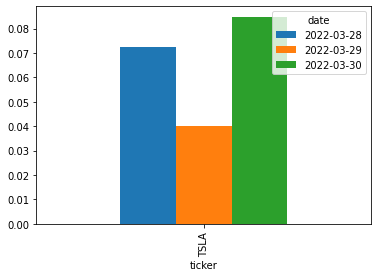

In [ ]:
plt.figure(figsize=(15,4))
mean_df = df.groupby(['ticker', 'date']).mean().unstack()
mean_df = mean_df.xs('compound', axis="columns")
mean_df.plot(kind='bar')
plt.show()

In [ ]:
pip install sweetviz

     |████████████████████████████████| 15.1 MB 4.1 MB/s 


In [ ]:
import sweetviz 

In [ ]:
my_report = sweetviz.analyze([df, "EDA"])

                                             |          | [  0%]   00:00 -> (? left)

In [ ]:
my_report.show_html('Report.html')

Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
df

,ticker,date,time,title,compound
0,AAPL,2022-03-23,09:52PM,Dow Jones Futures: Stock Market Rally Retreats...,0.0000
1,AAPL,2022-03-23,08:42PM,PRESS DIGEST-Financial Times - March 24,0.0000
2,AAPL,2022-03-23,08:00PM,Apple's Small Fintech Acquisition Could Procee...,0.3818
3,AAPL,2022-03-23,07:28PM,Tim Cook Displays His Difference in Russian In...,0.0000
4,AAPL,2022-03-23,07:21PM,Google Tests Letting Apps Like Spotify Offer O...,0.3612
...,...,...,...,...,...
95,AAPL,2022-03-17,11:05AM,Overlooked and underfunded: How 2-year HBCUs a...,-0.3400
96,AAPL,2022-03-17,10:49AM,Iridium (IRDM) Satcom Adopted by Japan-Based S...,0.0000
97,AAPL,2022-03-17,10:46AM,"Market strategist talks stocks, investing amid...",0.0000
98,AAPL,2022-03-17,10:26AM,Adobe (ADBE) Partners BMW Group for Experience...,0.0000
